In [3]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [4]:
true_mean = [1,3/2,6]
data = []
for i in range(100):
    for j in range(3):
        data.append([np.random.normal(loc=true_mean[j],scale=0.5,size = 1)[0],j])
data = pd.DataFrame(data,columns = ['x','group'])
data

,x,group
0,0.876574,0
1,0.788956,1
2,5.438778,2
3,1.834527,0
4,0.378876,1
...,...,...
295,2.264847,1
296,5.152032,2
297,1.158787,0
298,1.889450,1


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha1, alpha2, alpha3]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 7 seconds.


array([[<Axes: title={'center': 'alpha1'}>,
        <Axes: title={'center': 'alpha1'}>],
       [<Axes: title={'center': 'alpha2'}>,
        <Axes: title={'center': 'alpha2'}>],
       [<Axes: title={'center': 'alpha3'}>,
        <Axes: title={'center': 'alpha3'}>]], dtype=object)

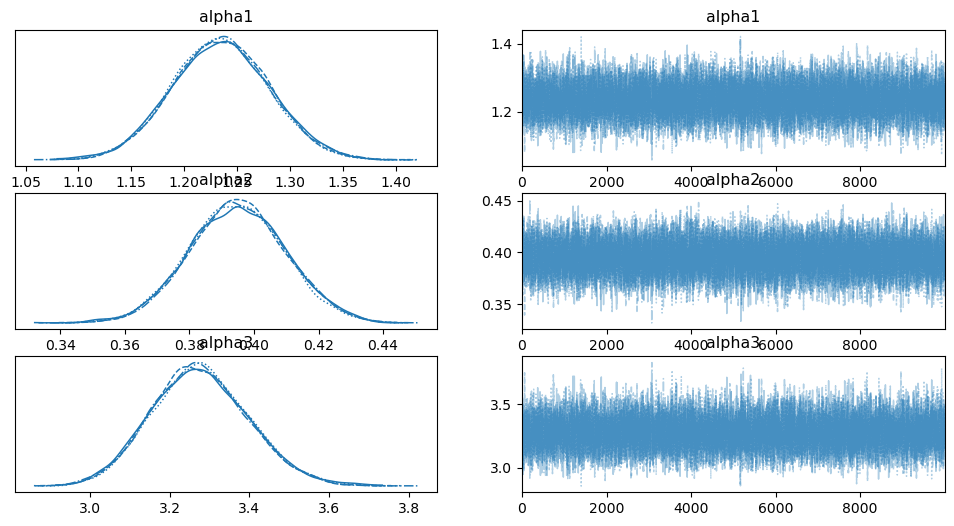

In [5]:
with pm.Model() as basic_model:
    alpha1 = pm.Normal('alpha1',mu=2,sigma=0.5)
    alpha2 = pm.Normal('alpha2',mu = 1/2,sigma=0.5)
    alpha3 = pm.Normal('alpha3',mu=3,sigma=0.5)
    def f(alpha1,alpha2,alpha3):
        return [alpha1*alpha2,alpha2*alpha3,alpha3*alpha1]
    mean = f(alpha1,alpha2,alpha3)
    var = {}
    for i in range(len(mean)):

        var[f'obs{i}'] = pm.Normal(f'obs{i}',mu= mean[i],sigma = 0.5,observed=data[data['group']==i])
    trace = pm.sample(10000, tune=1000, return_inferencedata=True)
az.summary(trace)
az.plot_trace(trace)

In [11]:
print(az.summary(trace)['mean'])
print(az.summary(trace)['sd'])

alpha1    1.234
alpha2    0.395
alpha3    3.276
Name: mean, dtype: float64
alpha1    0.046
alpha2    0.015
alpha3    0.122
Name: sd, dtype: float64
